In [367]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib

In [368]:
out_img_path = '/local/martipa/agemorph/thesis/images/HC_AD_plots'

In [369]:
def load_nii(path):
    nii = nib.load(path)
    vol = np.squeeze(nii.get_data().astype(np.float32))
    
    return vol

In [370]:
csv_path = '../../../data/brains_slice/split5_single_0247.csv'
assert os.path.isfile(csv_path)
csv = pd.read_csv(csv_path)
print(csv.shape)

(19480, 20)


In [408]:
pat_id = 'ADNI_120'
field = 1.5

csv_pat = csv[(csv.pat_id == pat_id) & (csv.field == field)]
csv_pat = csv_pat.drop_duplicates('examdate')
csv_pat = csv_pat.sort_values('examdate')
csv_pat['i'] = range(len(csv_pat))
print(csv_pat[['i', 'pat_id', 'img_id', 'examdate', 'pat_dx']])

img_ids = csv_pat.img_id.values

        i    pat_id       img_id    examdate  pat_dx
7166    0  ADNI_120   ADNI_10933  2006-02-06     1.0
4853    1  ADNI_120   ADNI_20659  2006-08-16     1.0
3363    2  ADNI_120   ADNI_40994  2007-02-16     1.0
14052   3  ADNI_120   ADNI_93249  2008-02-27     1.0
8860    4  ADNI_120  ADNI_137014  2009-02-25     1.0
18362   5  ADNI_120  ADNI_166617  2010-02-22     1.0
6798    6  ADNI_120  ADNI_216139  2011-02-07     1.0
19471   7  ADNI_120  ADNI_291187  2012-03-20     1.0
17964   8  ADNI_120  ADNI_361398  2013-02-25     1.0
2366    9  ADNI_120  ADNI_419898  2014-04-11     1.0
13365  10  ADNI_120  ADNI_477259  2015-03-12     1.0


In [409]:
use = [4,5,6,7,8,9]

# base image
base_img_id = csv_pat.iloc[use[0]].img_id
print(base_img_id)

# images
imgs = [load_nii(csv_pat.iloc[iloc].img_path) for iloc in use]

ADNI_137014


In [410]:
gen_dirs = sorted(glob.glob('../runs/*/predict/longterm/*/'+base_img_id))
print('found {} dirs'.format(len(gen_dirs)))

for i, gen_dir in enumerate(gen_dirs):
    print(i, gen_dir, '\n')

found 2 dirs
0 ../runs/gan_20190518_2207_gpu=0_bs=16_cl=8_lr=0.0001_b1=0.0_b2=0.9_ep=0.0001_pl=25_lk=0.2_bn=True_vr=0.5_is=6_cs=5_rf=10_rs=5_sw=True_reg=True_clf=False_glw=[1.0_500.0_5.0_100.0_0.0_0.0_25.0]_clw=[1_1_10]_tag=split5_AD_s1s2s3s4_s0/predict/longterm/gen_035/ADNI_137014 

1 ../runs/gan_20190518_2327_gpu=3_bs=16_cl=8_lr=0.0001_b1=0.0_b2=0.9_ep=0.0001_pl=25_lk=0.2_bn=True_vr=0.5_is=6_cs=5_rf=10_rs=5_sw=True_reg=True_clf=False_glw=[1.0_500.0_5.0_100.0_0.0_0.0_25.0]_clw=[1_1_10]_tag=split5_HC_s1s2s3s4_s0/predict/longterm/gen_035/ADNI_137014 



In [411]:
gen_AD = 0
gen_HC = 1

dir_AD = gen_dirs[gen_AD]
paths_AD = sorted(glob.glob(os.path.join(glob.escape(dir_AD), '*yf*.nii.gz')))

print('found {} gen_AD images'.format(len(paths_AD)))
for i, img_path in enumerate(paths_AD):
    print(i, os.path.basename(img_path))

dir_HC = gen_dirs[gen_HC]
paths_HC = sorted(glob.glob(os.path.join(glob.escape(dir_HC), '*yf*.nii.gz')))

print('found {} gen_HC images'.format(len(paths_HC)))
for i, img_path in enumerate(paths_HC):
    print(i, os.path.basename(img_path))

found 30 gen_AD images
0 ADNI_137014_yf_01.0.nii.gz
1 ADNI_137014_yf_02.0.nii.gz
2 ADNI_137014_yf_03.0.nii.gz
3 ADNI_137014_yf_04.0.nii.gz
4 ADNI_137014_yf_05.0.nii.gz
5 ADNI_137014_yf_06.0.nii.gz
6 ADNI_137014_yf_07.0.nii.gz
7 ADNI_137014_yf_08.0.nii.gz
8 ADNI_137014_yf_09.0.nii.gz
9 ADNI_137014_yf_10.0.nii.gz
10 ADNI_137014_yf_11.0.nii.gz
11 ADNI_137014_yf_12.0.nii.gz
12 ADNI_137014_yf_13.0.nii.gz
13 ADNI_137014_yf_14.0.nii.gz
14 ADNI_137014_yf_15.0.nii.gz
15 ADNI_137014_yf_16.0.nii.gz
16 ADNI_137014_yf_17.0.nii.gz
17 ADNI_137014_yf_18.0.nii.gz
18 ADNI_137014_yf_19.0.nii.gz
19 ADNI_137014_yf_20.0.nii.gz
20 ADNI_137014_yf_21.0.nii.gz
21 ADNI_137014_yf_22.0.nii.gz
22 ADNI_137014_yf_23.0.nii.gz
23 ADNI_137014_yf_24.0.nii.gz
24 ADNI_137014_yf_25.0.nii.gz
25 ADNI_137014_yf_26.0.nii.gz
26 ADNI_137014_yf_27.0.nii.gz
27 ADNI_137014_yf_28.0.nii.gz
28 ADNI_137014_yf_29.0.nii.gz
29 ADNI_137014_yf_30.0.nii.gz
found 30 gen_HC images
0 ADNI_137014_yf_01.0.nii.gz
1 ADNI_137014_yf_02.0.nii.gz
2 ADNI

In [412]:
use_AD = [0,1,2,3,5]
use_HC = [0,1,2,3,5]

imgs_AD = [load_nii(path) for i, path in enumerate(paths_AD) if i in use_AD]
imgs_HC = [load_nii(path) for i, path in enumerate(paths_HC) if i in use_HC]

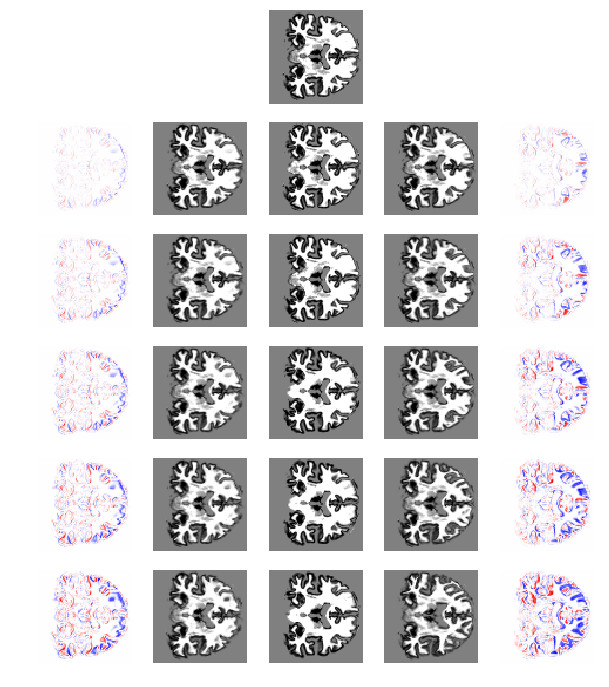

In [415]:
img_slice = 15

fig, grid = plt.subplots(6, 5)

fig.set_figwidth(10)
fig.set_figheight(12)

for i in range(len(grid)):
    for j in range(len(grid[0])):
        grid[i,j].axis('off')

# real
for i, img in enumerate(imgs):
    grid[i,2].imshow(img[:, img_slice, :], cmap='gray')
    
# AD
for i, img in enumerate(imgs_AD):
    grid[i+1,3].imshow(img[:, img_slice, :], cmap='gray')
    grid[i+1,4].imshow((img - imgs[0])[:, img_slice, :], cmap='bwr', vmin=-2, vmax=2)
    
# HC
for i, img in enumerate(imgs_HC):
    grid[i+1,1].imshow(img[:, img_slice, :], cmap='gray')
    grid[i+1,0].imshow((img - imgs[0])[:, img_slice, :], cmap='bwr', vmin=-2, vmax=2)
    
    
save = False
#save = True
if save:
    plt.savefig(os.path.join(out_img_path, 'comp_{}.pdf'.format(base_img_id)), dpi=250)

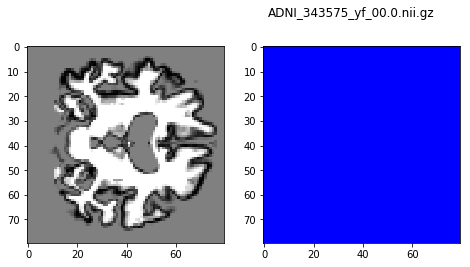

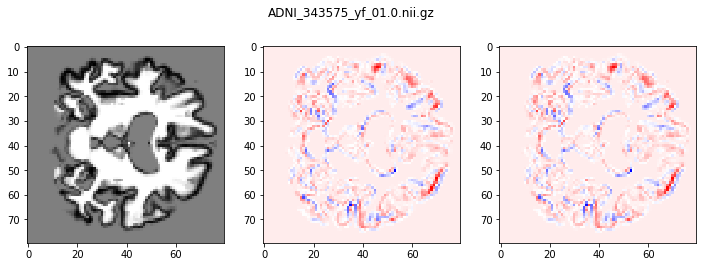

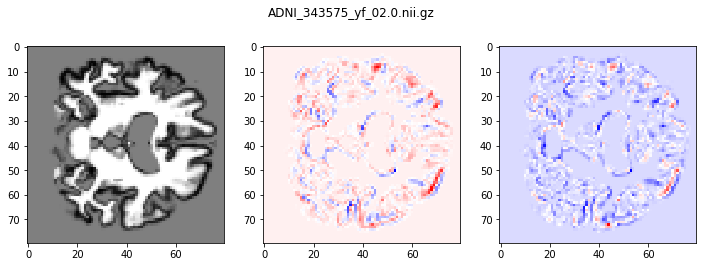

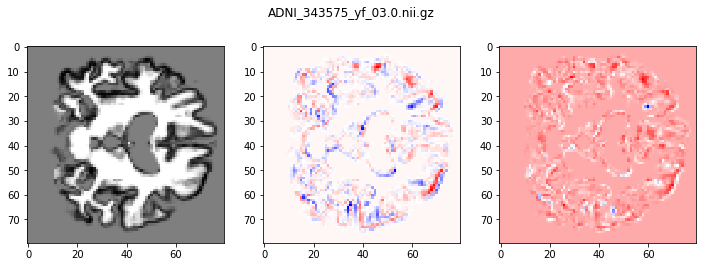

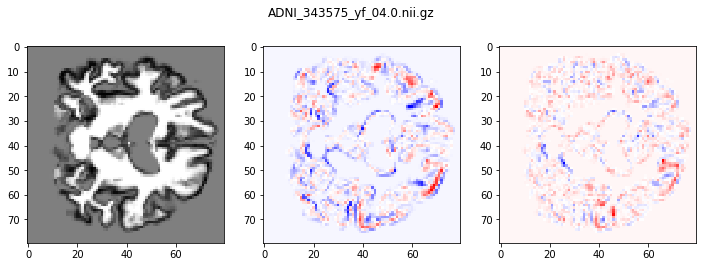

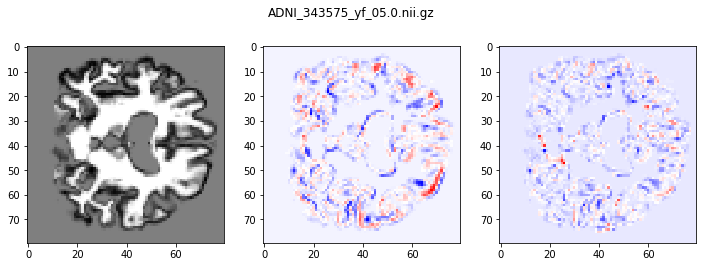

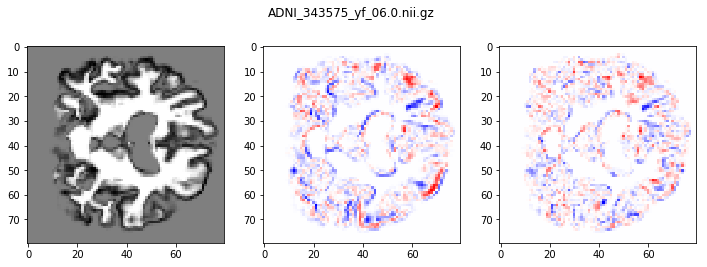

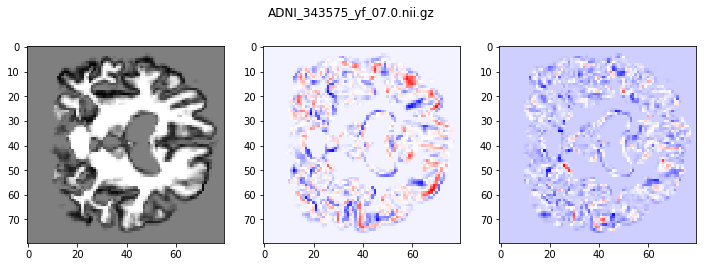

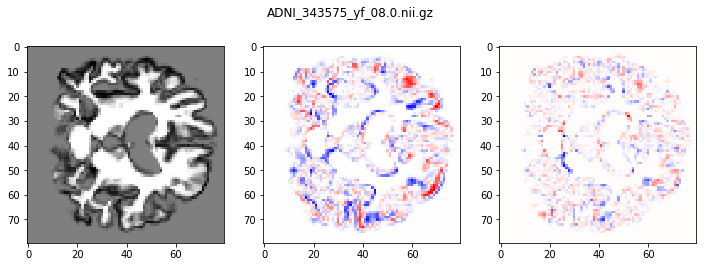

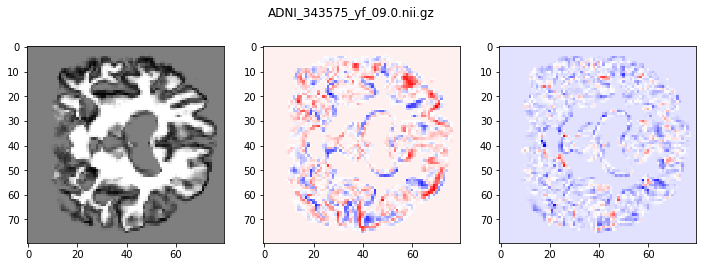

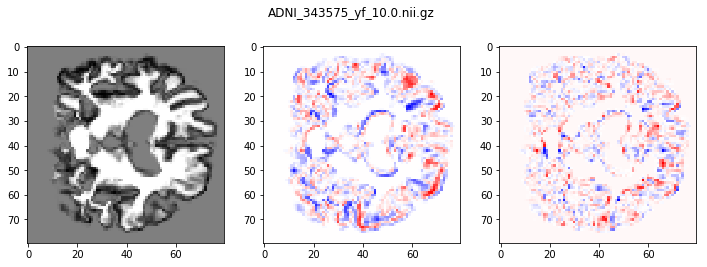

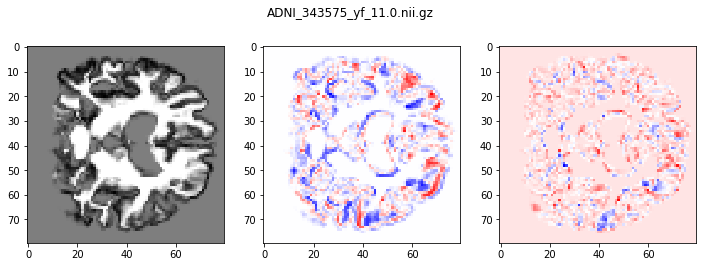

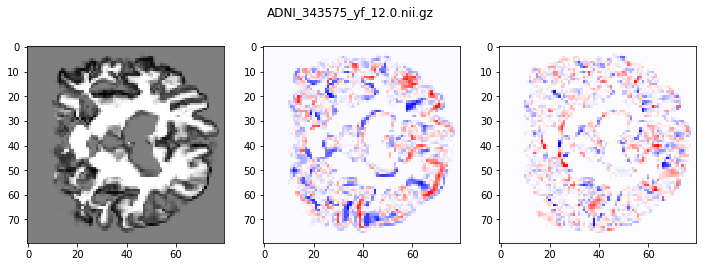

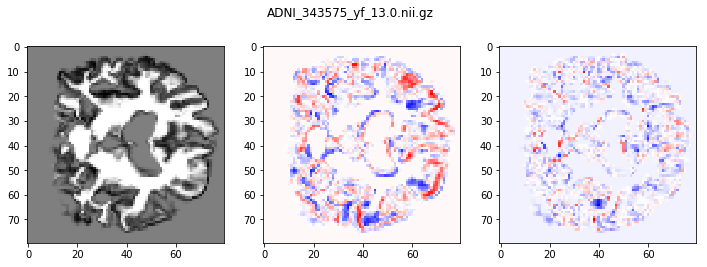

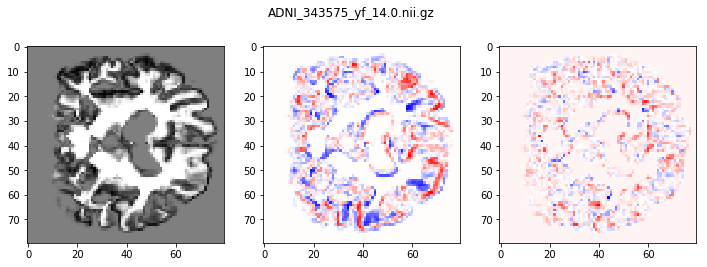

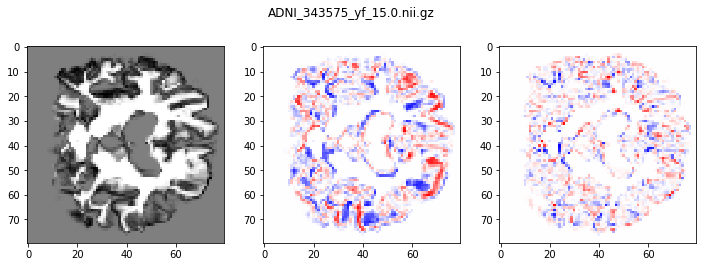

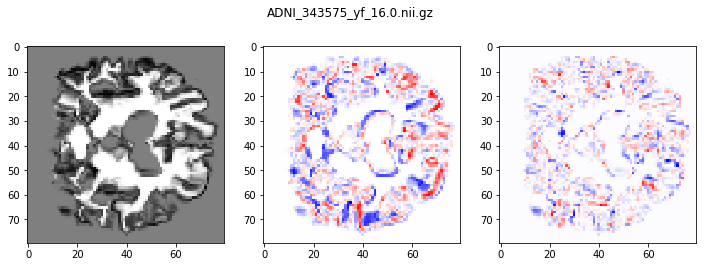

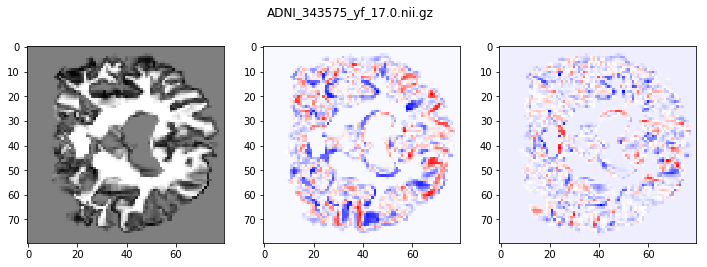

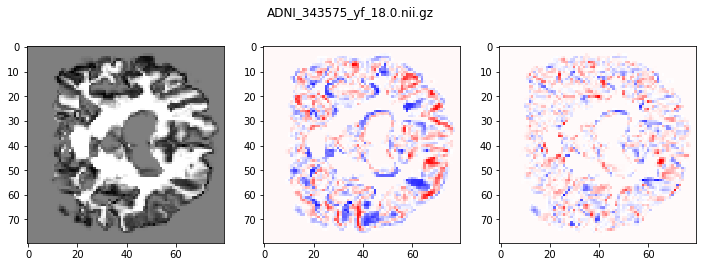

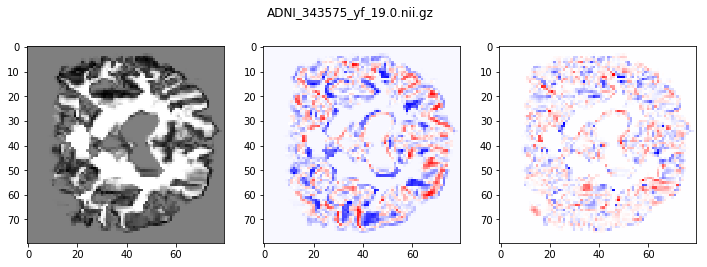

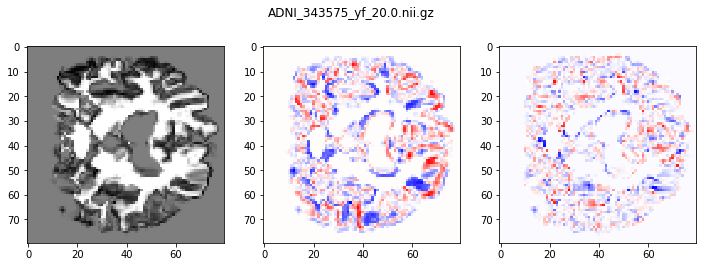

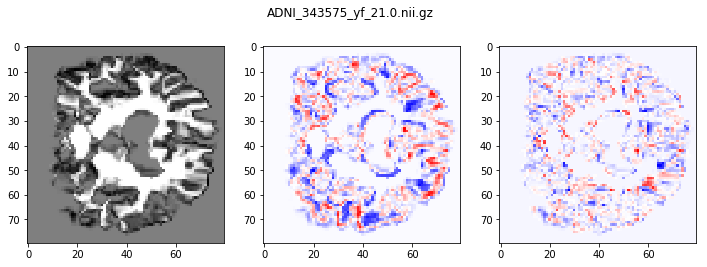

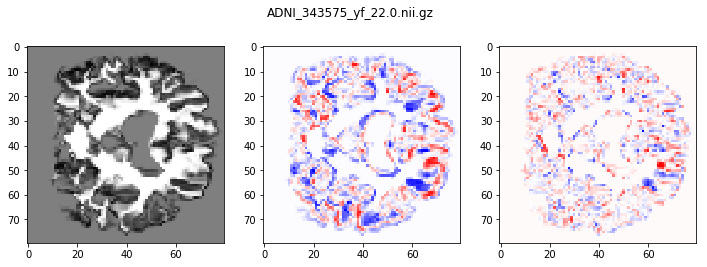

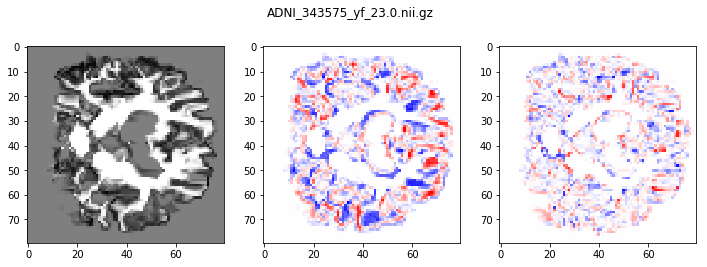

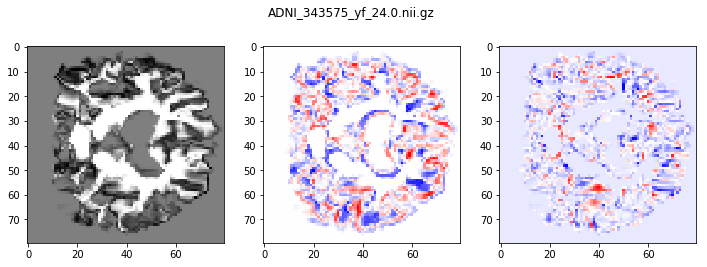

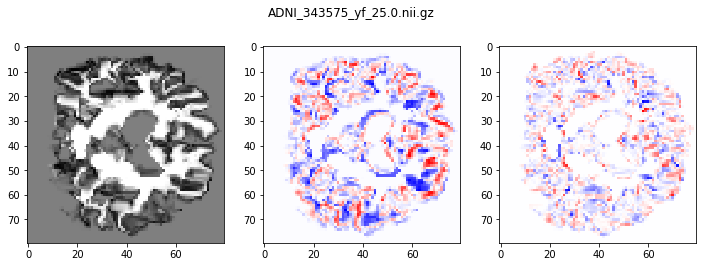

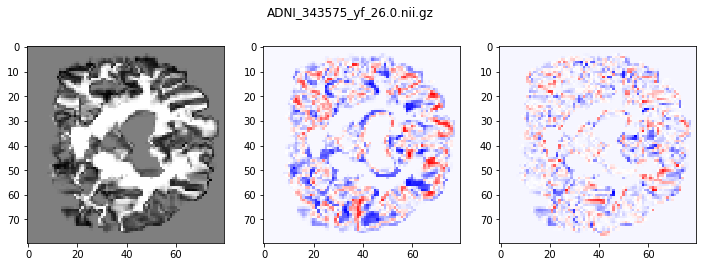

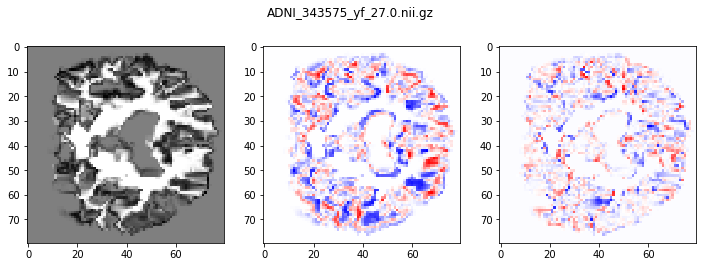

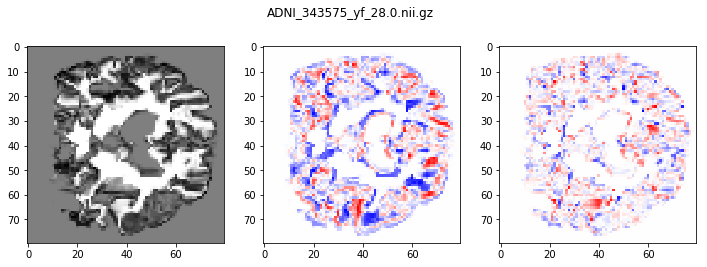

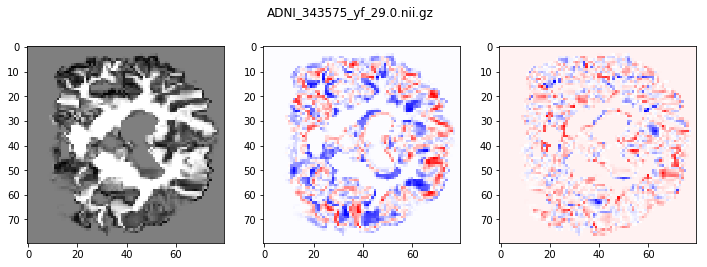

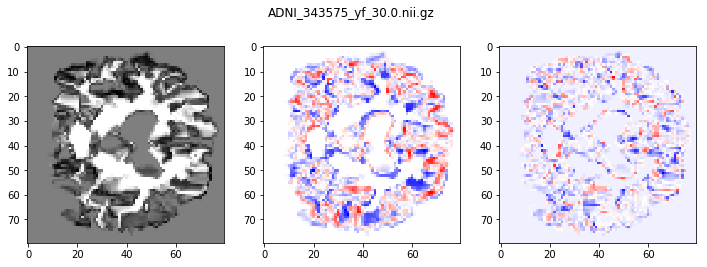

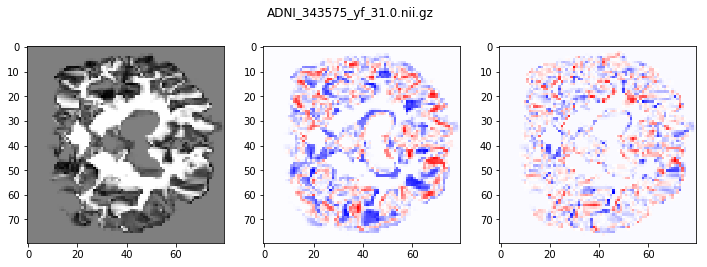

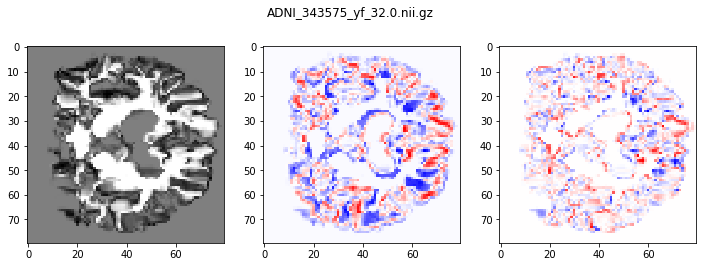

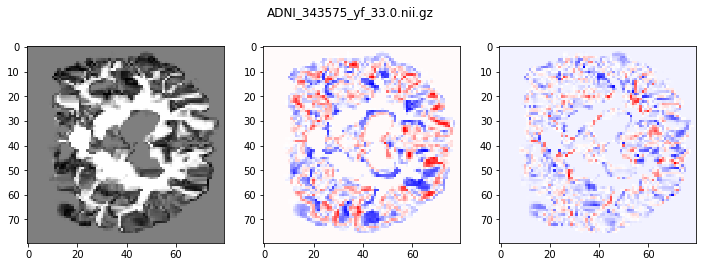

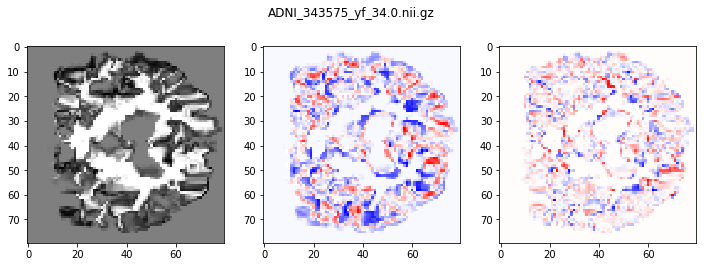

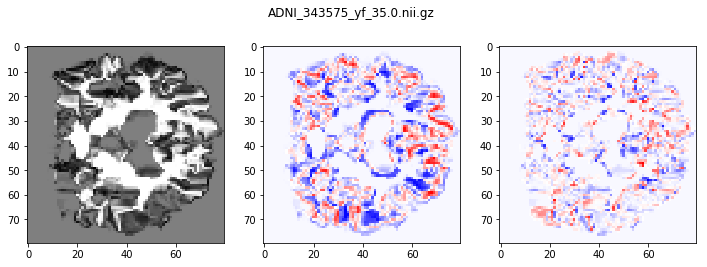

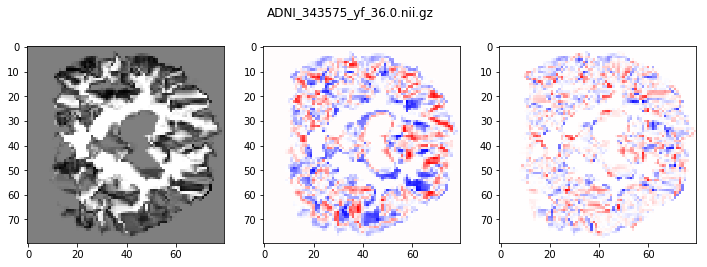

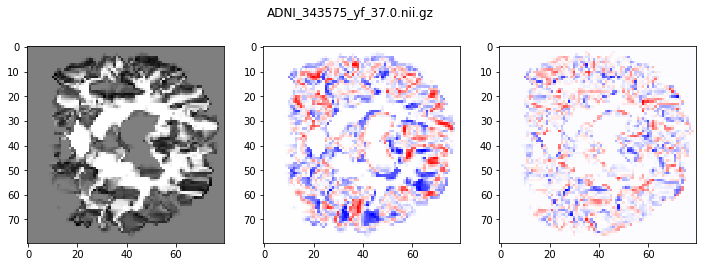

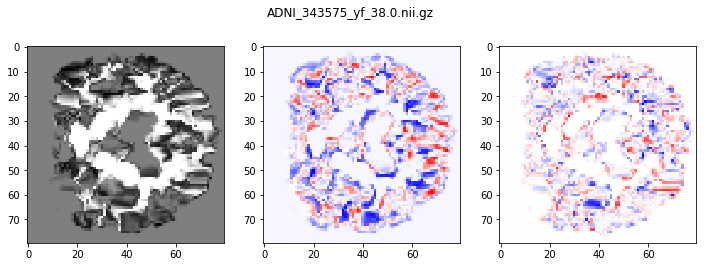

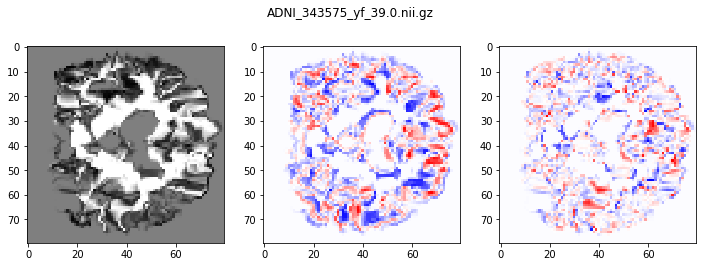

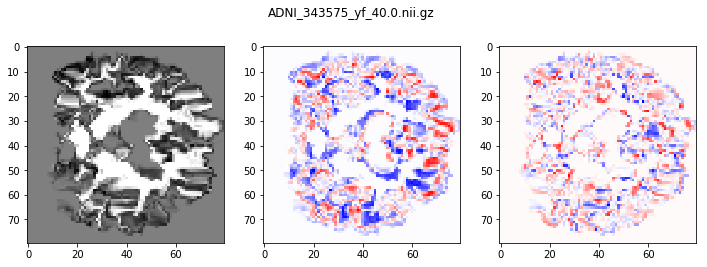

In [17]:
imgs = sorted(imgs)

vols = []

for img in imgs:
    nii = nib.load(img)
    vol = nii.get_data().astype(np.float32)
    vols.append(vol)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.suptitle(os.path.basename(img))
    
    plt.imshow(vol[:, 16, :, 0], cmap='gray')
    plt.subplot(1, 3, 2)
    plt.imshow((vol - vols[0])[:, 16, :, 0], cmap='bwr')
    if len(vols) >= 2:
        plt.subplot(1, 3, 3)
        plt.imshow((vol - vols[-2])[:, 16, :, 0], cmap='bwr')

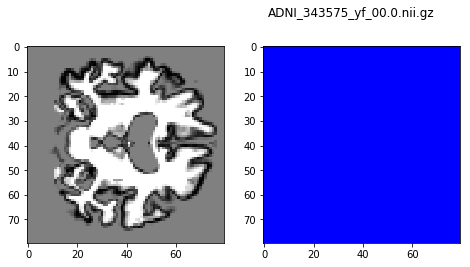

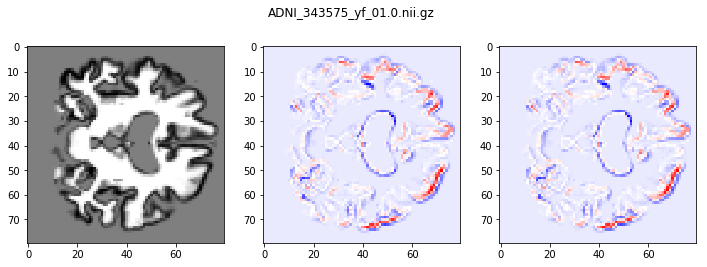

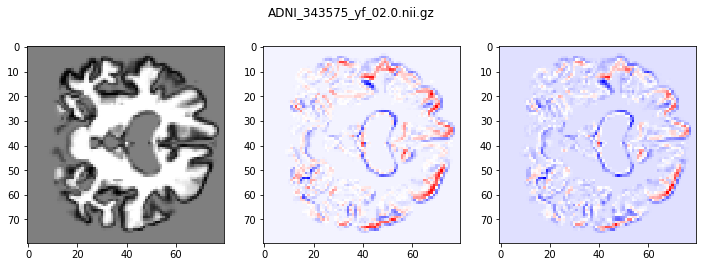

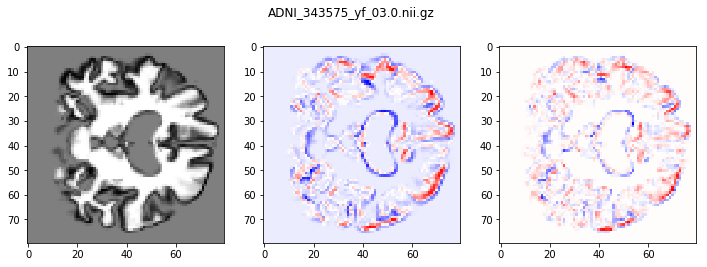

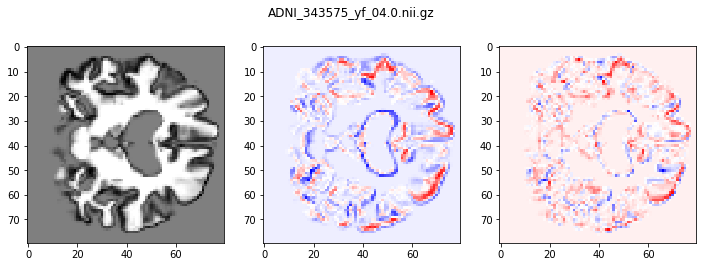

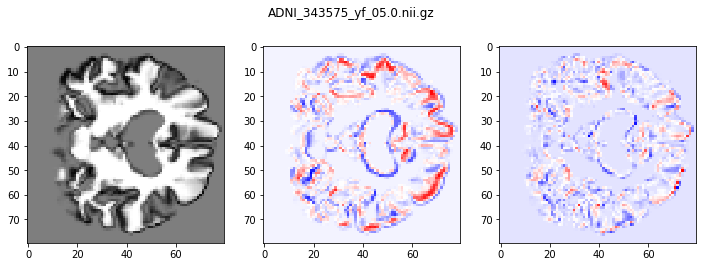

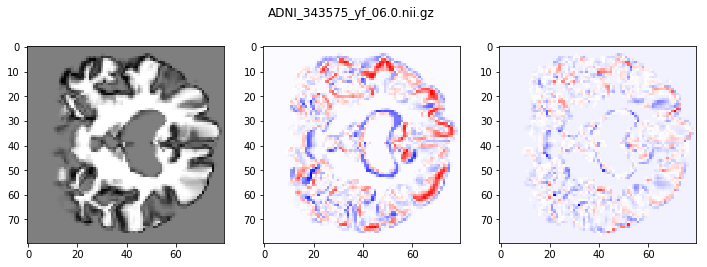

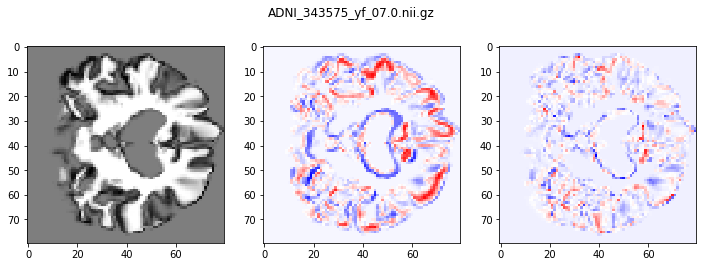

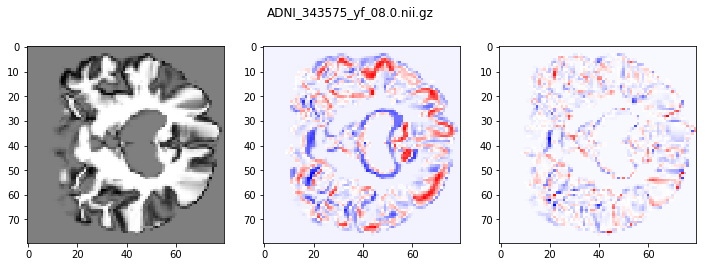

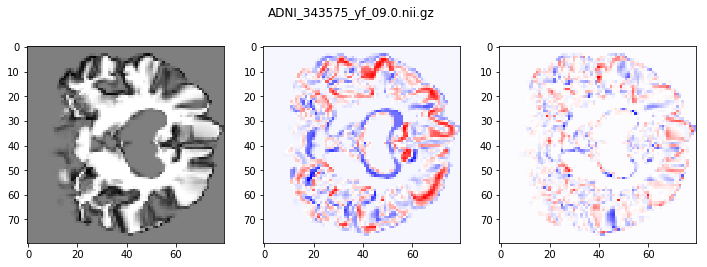

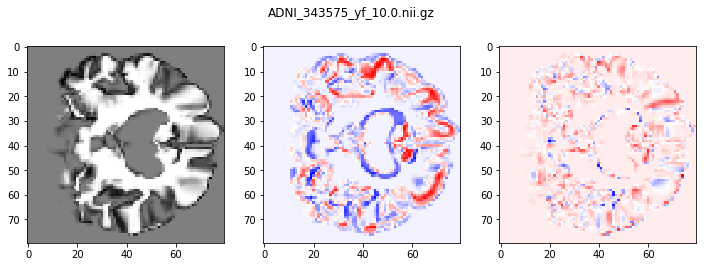

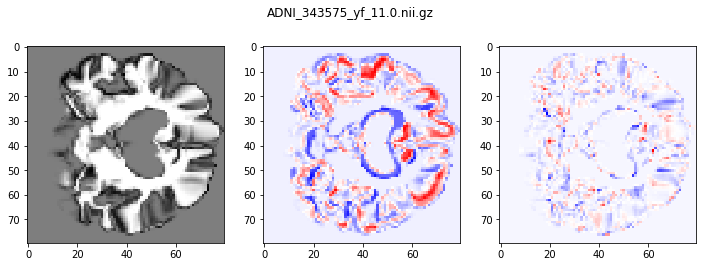

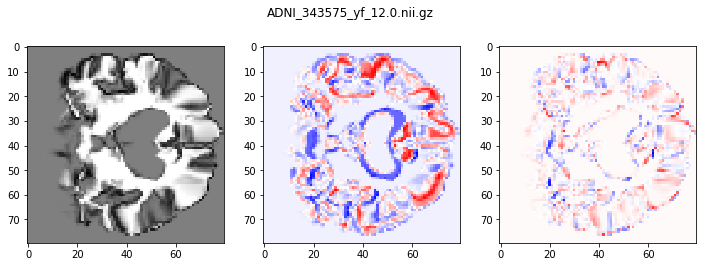

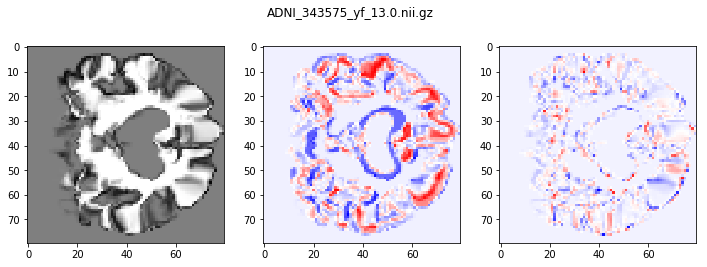

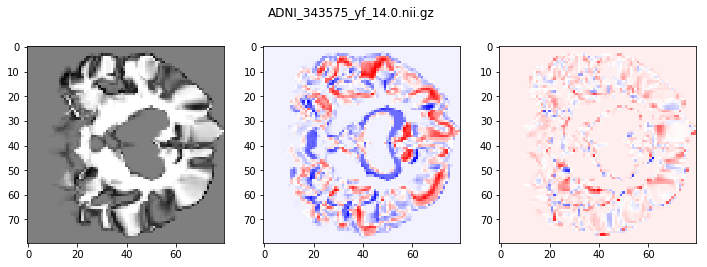

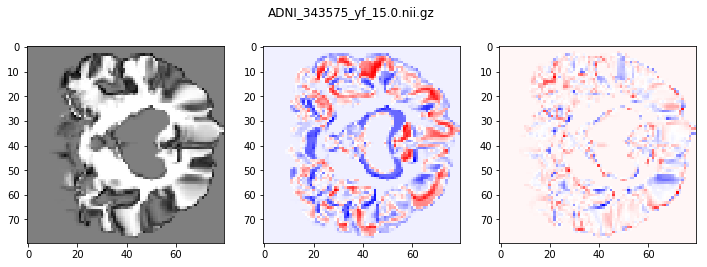

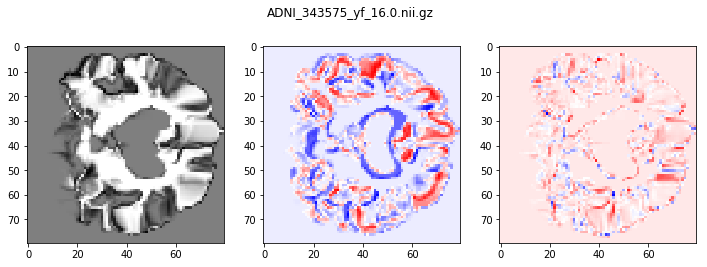

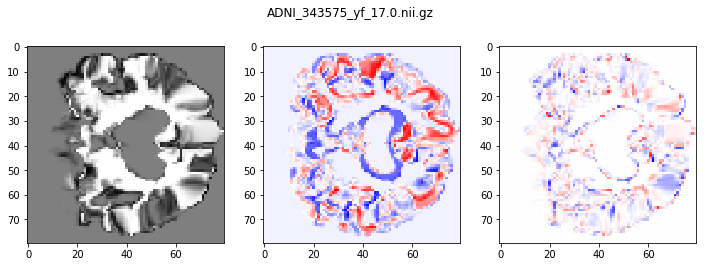

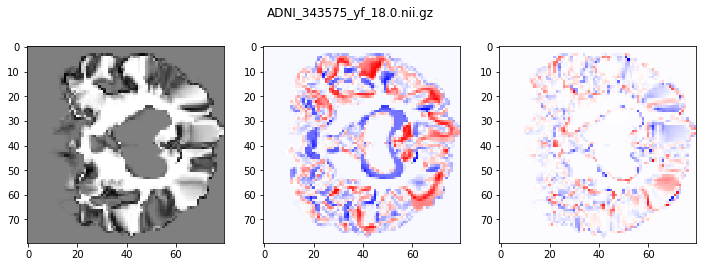

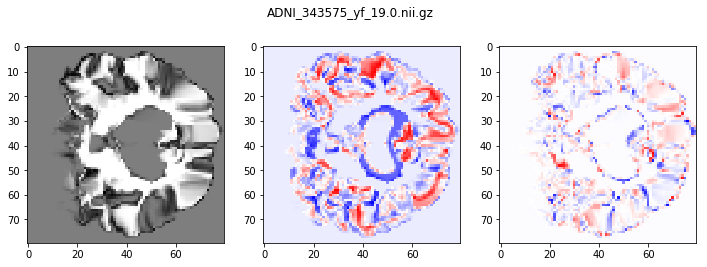

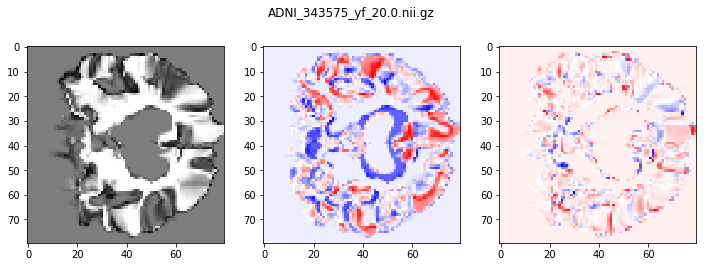

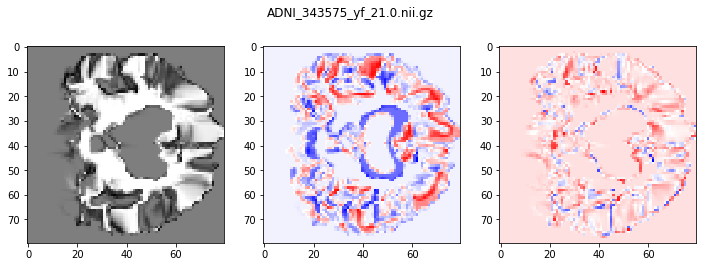

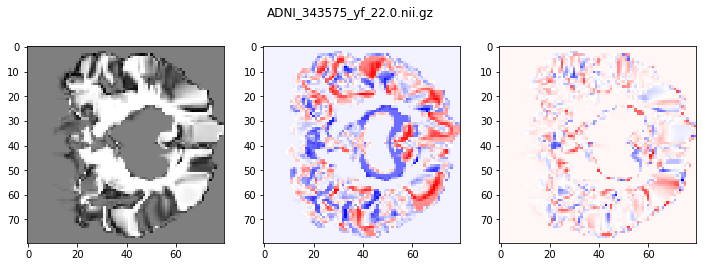

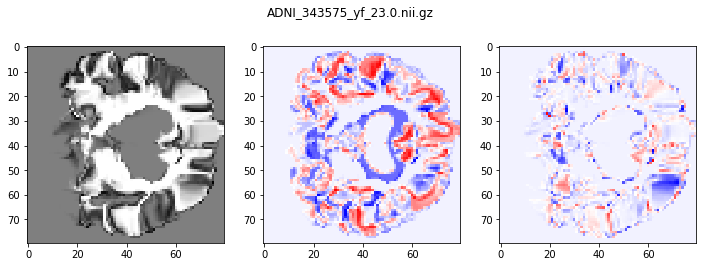

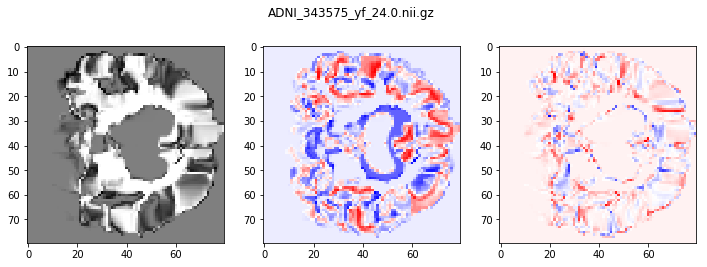

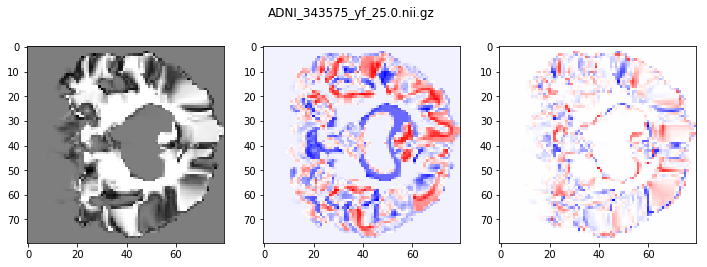

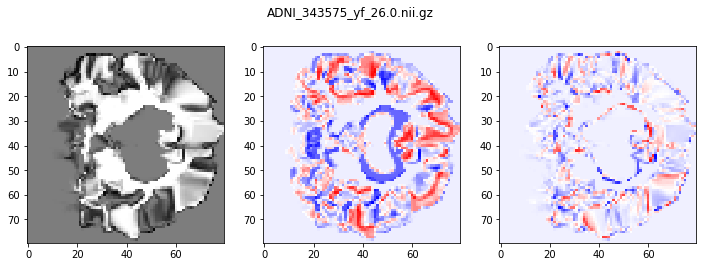

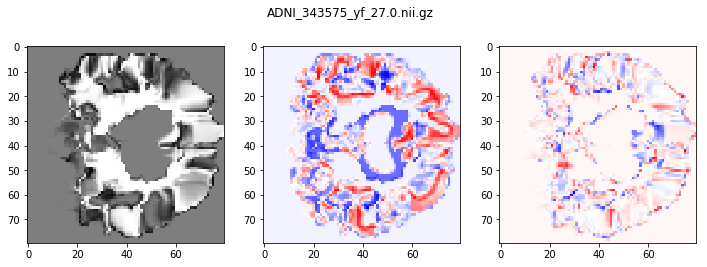

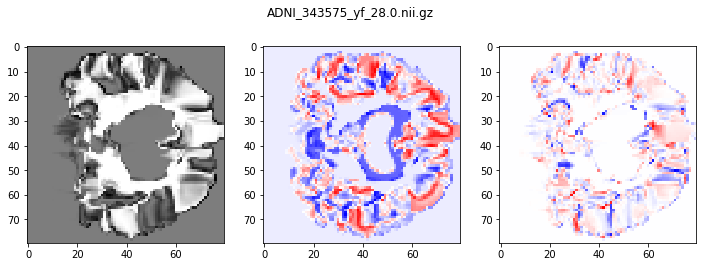

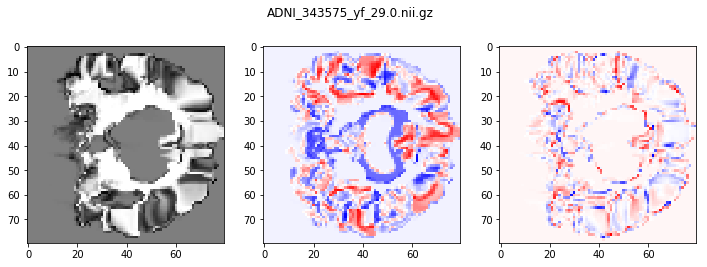

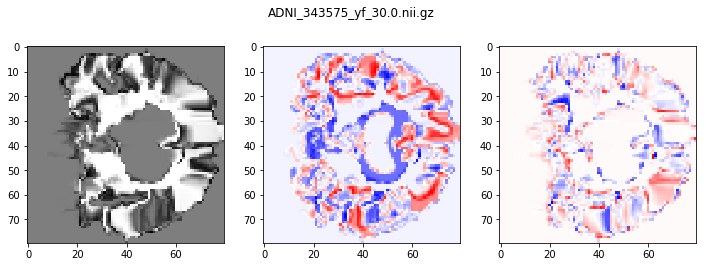

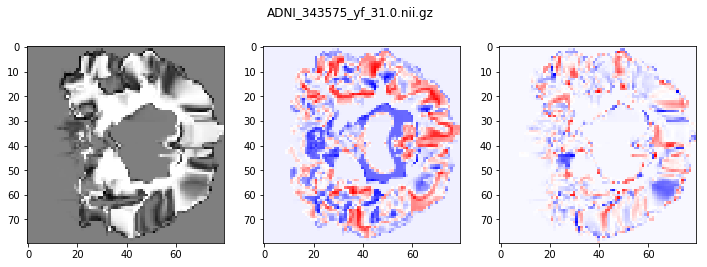

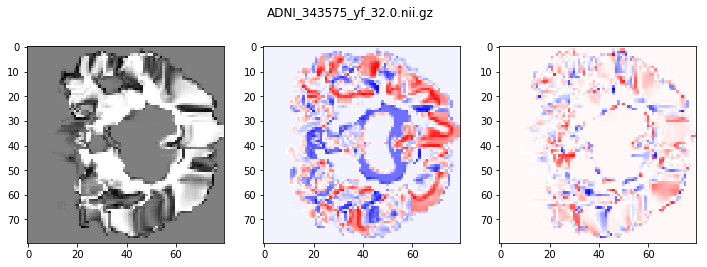

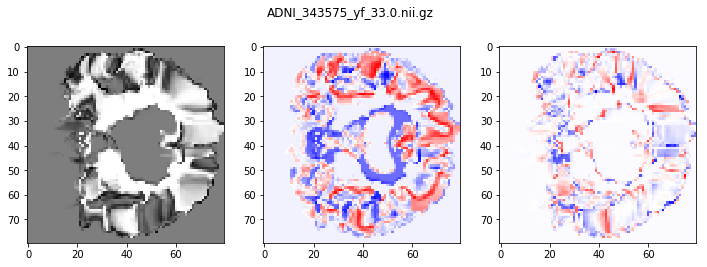

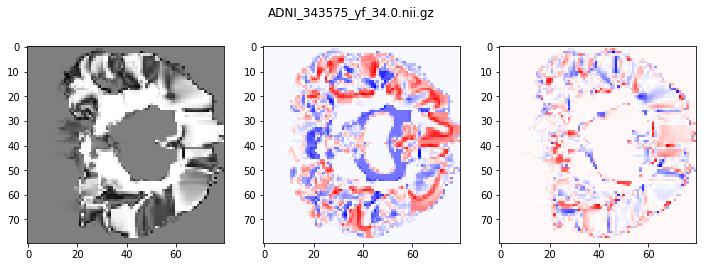

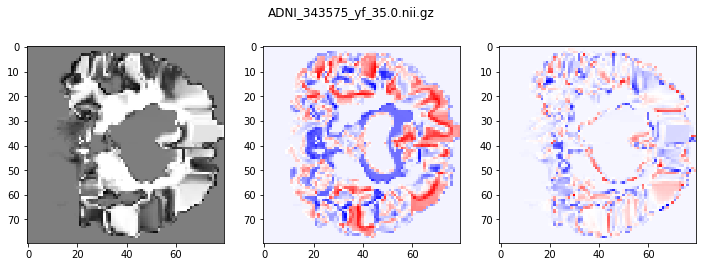

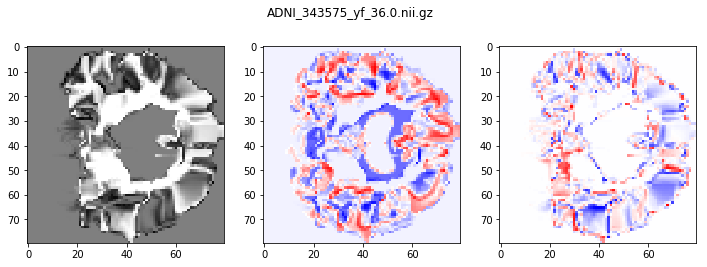

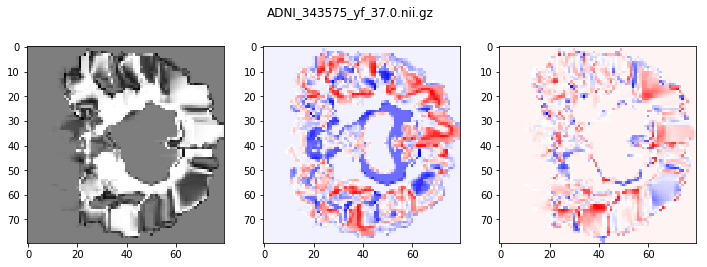

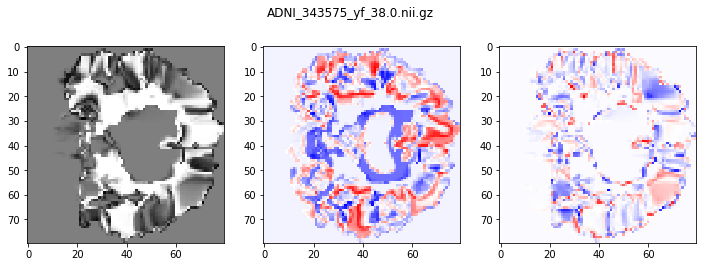

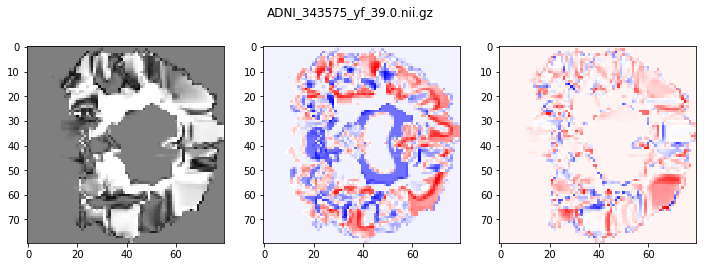

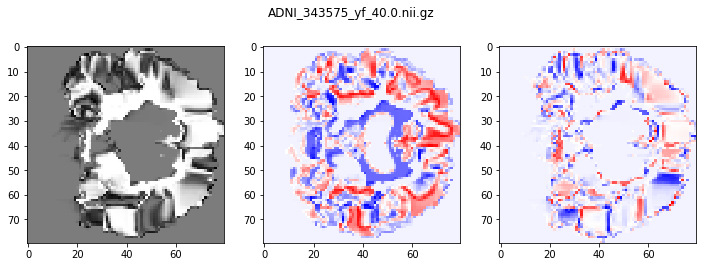

In [14]:
imgs = sorted(imgs)

vols = []

for img in imgs:
    nii = nib.load(img)
    vol = nii.get_data().astype(np.float32)
    vols.append(vol)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.suptitle(os.path.basename(img))
    
    plt.imshow(vol[:, 16, :, 0], cmap='gray')
    plt.subplot(1, 3, 2)
    plt.imshow((vol - vols[0])[:, 16, :, 0], cmap='bwr')
    if len(vols) >= 2:
        plt.subplot(1, 3, 3)
        plt.imshow((vol - vols[-2])[:, 16, :, 0], cmap='bwr')